In [1]:
# Insert this at the top of your notebook's first code cell

import sys
import os

# Get the path of the project's root directory (parent of 'notebooks')
notebook_dir = os.path.dirname(os.getcwd())
if notebook_dir not in sys.path:
    sys.path.append(notebook_dir)

In [2]:
# Note: Ensure you have run the path fix cell (sys.path.append(...)) 
# before executing this block.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from src.data_processing import load_data, preprocess_data, clean_text
from src.model_training import create_pipelines, evaluate_models

# --- Configuration ---
DATA_PATH = '../data/toxic_comments.csv' 
RANDOM_STATE = 42

# 1. Load, Preprocess, and Split Data
comments = load_data(DATA_PATH)
X, y = preprocess_data(comments, balance_classes=True, random_state=RANDOM_STATE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

# 2. Create and Fit ALL Models (needed for comparison plots)
pipelines = create_pipelines(random_state=RANDOM_STATE)
best_logit = pipelines["LogisticRegression"]
best_forest = pipelines["RandomForest"]
best_mnb = pipelines["MultinomialNB"]

# Fit all models using the training data
best_logit.fit(X_train, y_train)
best_forest.fit(X_train, y_train)
best_mnb.fit(X_train, y_train)

target_names = ['non-toxic', 'toxic']

# F1 Scores from your main.py run for plotting
F1_scores = [0.7852, 0.7433, 0.7787] # LR, RF, MNB
models = list(pipelines.keys())

In [3]:
# Cell 2: Load Data (using the function from src)
DATA_PATH = '../data/toxic_comments.csv' 
comments = load_data(DATA_PATH)
comments.head()

,text,toxic
0,you have yet to identify where my edits violat...,0
1,"""\n as i have already said,wp:rfc or wp:ani. (...",0
2,your vote on wikiquote simple english when it ...,0
3,your stalking of my edits i've opened a thread...,0
4,straight from the smear site itself. the perso...,1


toxic
0    4350
1     650
Name: count, dtype: int64


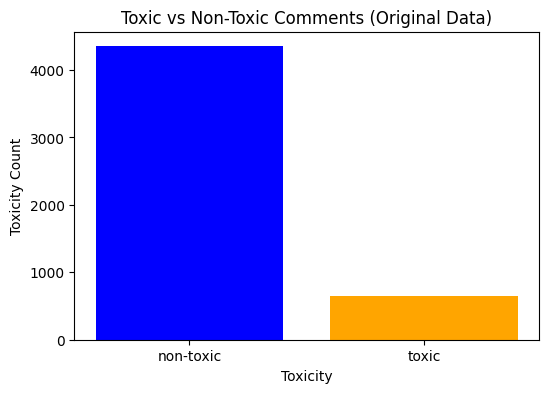

In [4]:
# Cell 3: Class Distribution Check
# Now runs on the original, unbalanced data
print(comments.toxic.value_counts())

counts = comments.toxic.value_counts()
Index = [1, 2]
plt.figure(figsize=(6, 4))
plt.bar(Index, counts, color=['blue', 'orange'])
plt.xticks(Index, ['non-toxic', 'toxic'])
plt.ylabel('Toxicity Count')
plt.xlabel('Toxicity')
plt.title('Toxic vs Non-Toxic Comments (Original Data)')
plt.show()

In [5]:
# Cell 4: Word Frequency Analysis (Requires the cleaning function)
# You must clean the text just for visualization purposes inside the notebook.
comments['clean_text'] = comments['text'].apply(clean_text)

toxic_data = comments[comments['toxic'] == 1]
non_toxic_list = ' '.join(comments[comments['toxic'] == 0]['clean_text'].tolist())
toxic_list = ' '.join(toxic_data['clean_text'].tolist())

toxic_word_counts = Counter(toxic_list.split())
non_toxic_word_counts = Counter(non_toxic_list.split())

print("Top 5 Toxic Words:", toxic_word_counts.most_common(5))
print("Top 5 Non-Toxic Words:", non_toxic_word_counts.most_common(5))

Top 5 Toxic Words: [('buttsecks', 497), ('hate', 468), ('bastered', 435), ('idiot', 308), ('vomit', 217)]
Top 5 Non-Toxic Words: [('article', 1252), ('page', 974), ('talk', 895), ('wikipedia', 863), ('please', 736)]


Text(0.5, 1.0, 'Toxic vs Non-Toxic Comments')

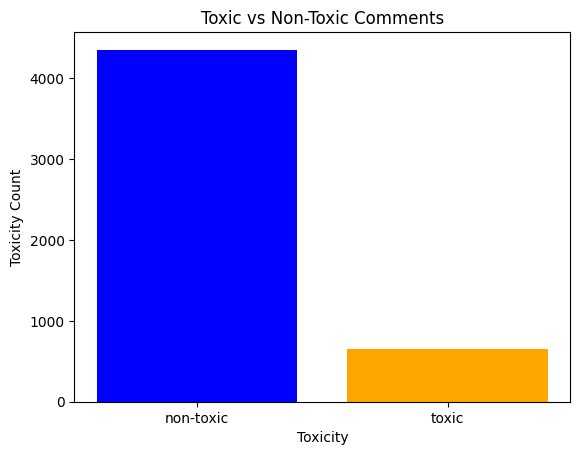

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

counts=comments.toxic.value_counts()

Index = [1,2]
plt.bar(Index,counts,color=['blue', 'orange'])
plt.xticks(Index,['non-toxic','toxic'])
plt.ylabel('Toxicity Count')
plt.xlabel('Toxicity')
plt.title('Toxic vs Non-Toxic Comments')

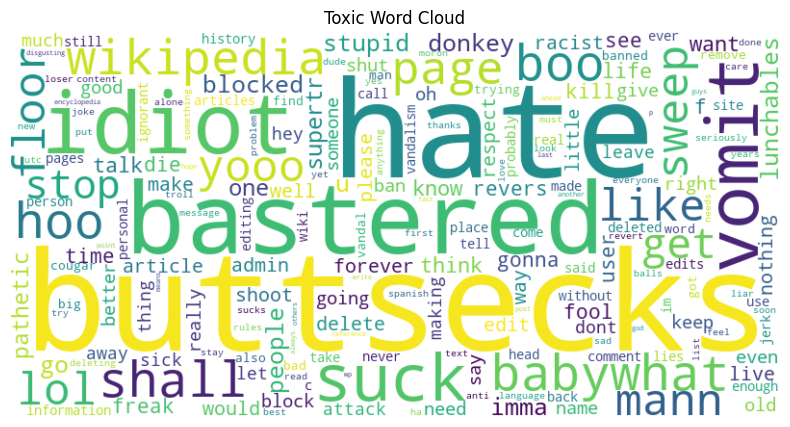

In [7]:
# Cell 5: Word Cloud for Toxic Comments (Replacing Cell 64)
from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(toxic_word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Toxic Word Cloud")
plt.show()

In [8]:
# Cell 6: Prepare Data (Use the preprocessing function)
X, y = preprocess_data(comments, balance_classes=True, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the best model (Logistic Regression in your case)
pipelines = create_pipelines(random_state=42)
best_logit = pipelines["LogisticRegression"]
best_logit.fit(X_train, y_train)

# Run evaluation function (or re-run evaluation logic)
# This will output the full tables you saw in the console.
test_f1_scores = evaluate_models(pipelines, X_train, y_train, X_test, y_test, cv=5)


--- Model Evaluation (Cross-Validation) ---
--- LogisticRegression CV completed in 5.90s ---
--- RandomForest CV completed in 4.06s ---
--- MultinomialNB CV completed in 0.06s ---
╒════════════════════╤════════════╤════════════════════════╤════════════════════════╤════════════════════════╤════════════════════════╕
│ model              │ fit_time   │ accuracy               │ precision              │ recall                 │ f1                     │
╞════════════════════╪════════════╪════════════════════════╪════════════════════════╪════════════════════════╪════════════════════════╡
│ LogisticRegression │ 0.15s      │ 0.79423 (STD +/- 0.02) │ 0.79483 (STD +/- 0.02) │ 0.79423 (STD +/- 0.02) │ 0.79417 (STD +/- 0.02) │
├────────────────────┼────────────┼────────────────────────┼────────────────────────┼────────────────────────┼────────────────────────┤
│ RandomForest       │ 2.04s      │ 0.73750 (STD +/- 0.06) │ 0.74761 (STD +/- 0.05) │ 0.73750 (STD +/- 0.06) │ 0.73303 (STD +/- 0.06) │
├──

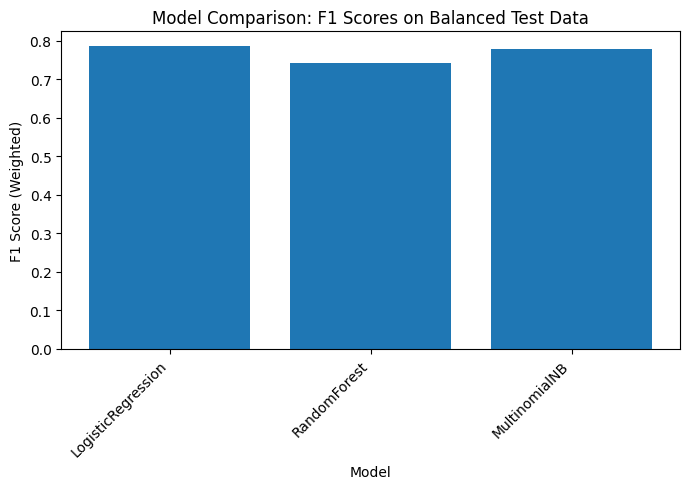

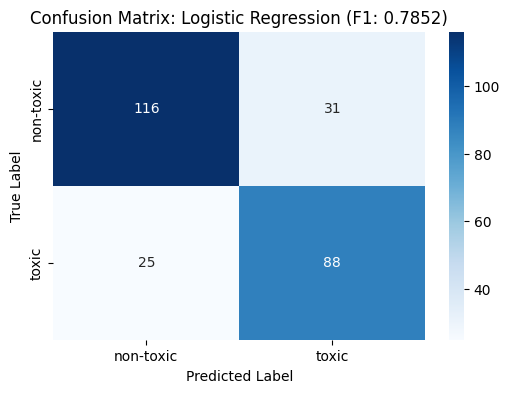

In [9]:
# F1 Score Plot (Bar Chart)
Index = np.arange(len(models))
plt.figure(figsize=(7, 5))
plt.bar(Index, F1_scores)
plt.xticks(Index, models, rotation=45, ha='right')
plt.ylabel('F1 Score (Weighted)')
plt.xlabel('Model')
plt.title('Model Comparison: F1 Scores on Balanced Test Data')
plt.tight_layout()
plt.savefig('f1_scores_plot.png')
plt.show()

# --- Confusion Matrix (Best Model: Logistic Regression) ---
y_pred_logit = best_logit.predict(X_test)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_logit), 
            annot=True, 
            cmap='Blues', 
            fmt='d',
            xticklabels=target_names, 
            yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Logistic Regression (F1: 0.7852)')
plt.savefig('confusion_matrix_logit.png')
plt.show()

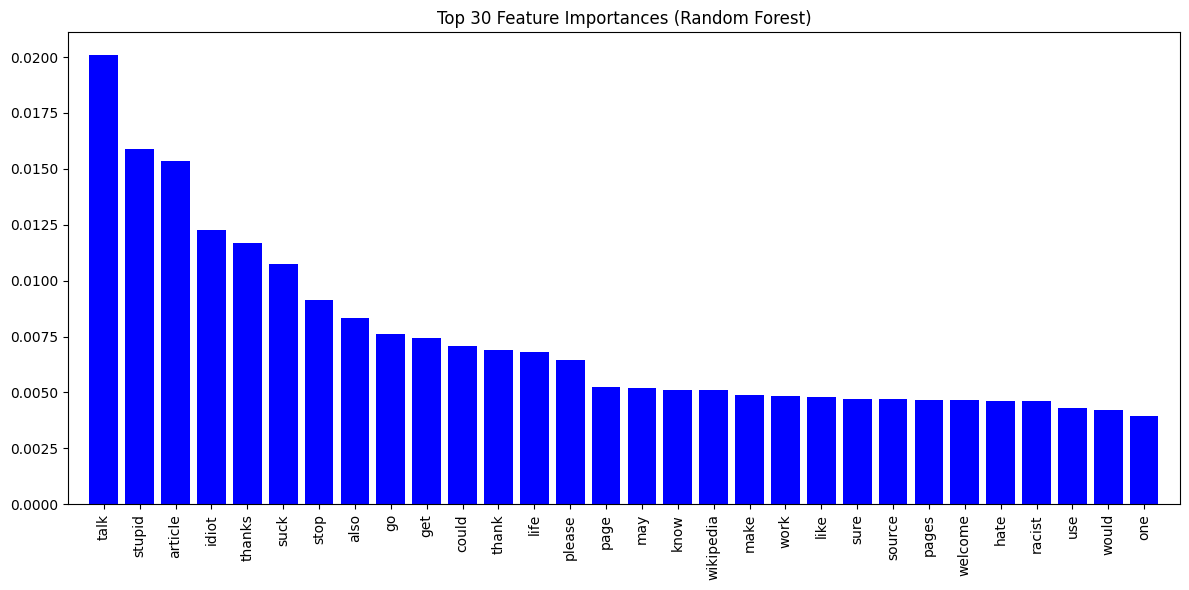

In [10]:
# Feature Importance Plot (Random Forest)
X_columns = best_forest.named_steps['tfidf'].get_feature_names_out()
importances = best_forest.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]
top_30_indices = indices[0:30]
feature_names = [X_columns[i] for i in top_30_indices]

plt.figure(figsize=(12, 6))
plt.bar(range(top_30_indices.shape[0]),
        importances[top_30_indices],
        color='blue',
        align='center')
plt.xticks(range(top_30_indices.shape[0]),
           feature_names,
           rotation=90)
plt.xlim([-1, top_30_indices.shape[0]])
plt.title('Top 30 Feature Importances (Random Forest)')
plt.tight_layout()
plt.savefig('feature_importance_rf.png')
plt.show()

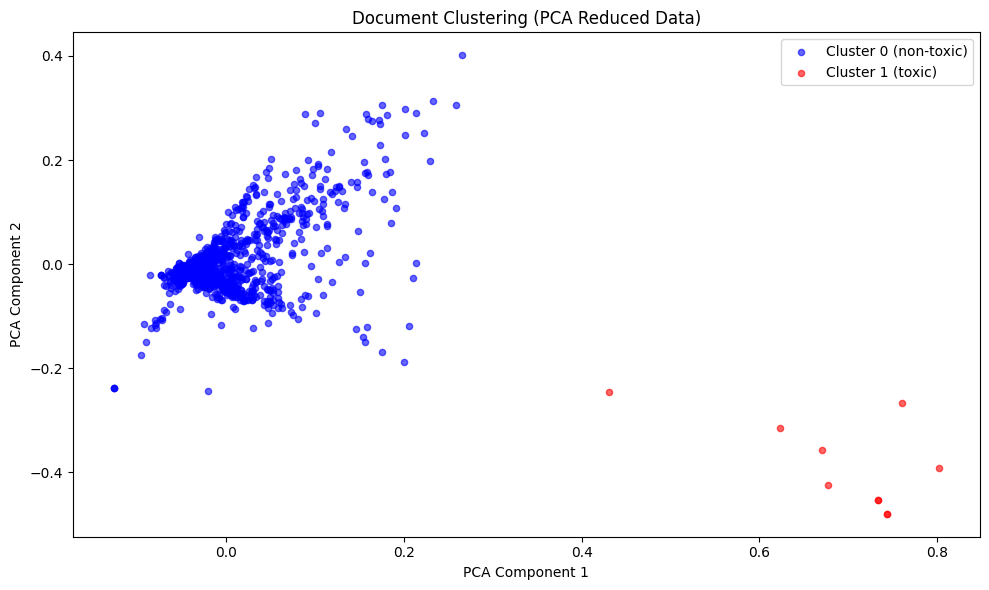

In [11]:
# PCA/K-Means Clustering Visualization
from sklearn.decomposition import PCA

# 1. Vectorize Clean Text from the COMBINED (balanced) DataFrame
vectorizer = TfidfVectorizer(stop_words='english')
# Use the full X (all processed samples) for clustering
vectorized_documents = vectorizer.fit_transform(X)

# 2. Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2, random_state=RANDOM_STATE)
reduced_data = pca.fit_transform(vectorized_documents.toarray())

# 3. K-Means Clustering (K=2, matching the two classes)
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, n_init=5, max_iter=500, random_state=RANDOM_STATE)
kmeans.fit(reduced_data)

# 4. Plot the results
plt.figure(figsize=(10, 6))
colors = ['blue', 'red']
cluster_labels = ['non-toxic', 'toxic']

# Scatter plot using the PCA components and K-Means labels
for i in range(num_clusters):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0],
                reduced_data[kmeans.labels_ == i, 1],
                s=20, 
                color=colors[i],
                label=f'Cluster {i} ({cluster_labels[i]})',
                alpha=0.6)

plt.title('Document Clustering (PCA Reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.tight_layout()
plt.savefig('pca_clustering.png')
plt.show()